## 1. Notebook Initialization

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from random import randint

In [2]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/"

## 2. Preliminar Tests

In [25]:
data = pd.read_csv(PATH+'IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
#data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Prediction
1985-03,7.209340,-1.277433,-4.327074,0.744988,-0.531027,1.004126,-0.851989,0.255075,0.567930,0.358221,0.249011,-0.825895,-0.529244,-0.904615,0.108156,13.035309
1985-06,6.893940,-1.709273,-4.122886,0.839108,-0.084579,0.662230,-0.702346,0.412531,0.417298,0.335329,0.320465,-0.796355,-0.511677,-0.911772,0.053614,13.160484
1985-09,6.840612,-1.861249,-4.010557,0.853306,0.313719,0.373128,-0.606786,0.467951,0.294372,0.336179,0.442101,-0.763784,-0.365508,-1.040820,-0.006936,16.657703
1985-12,6.474170,-2.301664,-2.786799,0.813373,1.078394,-1.110566,0.165312,-0.661390,-0.011733,-1.538154,-1.748788,1.511953,2.094579,-2.148002,-0.488341,16.345213
1986-03,6.984757,-1.078512,-4.273619,0.965144,-0.481375,0.769691,-0.759288,0.313615,0.691866,0.534520,0.258234,-0.727637,-0.601165,-0.645276,0.301987,15.921562
1986-06,6.703357,-1.475482,-3.981249,1.041278,-0.050192,0.376266,-0.612618,0.401608,0.572831,0.521254,0.353652,-0.733017,-0.598664,-0.624598,0.291843,14.741072
1986-09,6.839550,-1.464323,-3.825255,1.003054,0.289928,0.137663,-0.445792,0.370006,0.541914,0.320909,0.680234,-0.660708,-0.283203,-0.492592,0.178491,13.267827
1986-12,6.667392,-1.620497,-2.577314,0.870116,1.241689,-1.467642,0.361518,-0.952107,0.198746,-1.781227,-1.992376,1.711574,2.398984,-1.761953,-0.342443,16.734827
1987-03,7.198027,-0.659948,-4.445436,0.929271,-0.476685,0.859010,-0.458682,0.259011,0.669047,0.543142,0.410577,-0.547864,-0.410874,-0.329028,0.352228,18.234604
1987-06,6.837969,-1.090749,-4.256983,1.012418,-0.040583,0.573919,-0.306082,0.369929,0.533837,0.619256,0.635799,-0.499934,-0.381354,-0.416362,0.341966,17.033018


In [26]:
X_scaled = np.array(data.drop(['Prediction'], axis=1))
y_scaled = np.array(data['Prediction'])

In [27]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)
y_train = y_train.ravel()
y_test = y_test.ravel()

In [30]:
mlp = GridSearchCV(MLPRegressor(max_iter=100000),
                   param_grid={"hidden_layer_sizes": [(100,), (100, 100), (100, 50), (50,50), (50,)],
                               "activation": ['identity', 'logistic', 'tanh', 'relu'],
                               "solver": ['sgd', 'adam']
                              },
                   scoring="neg_root_mean_squared_error"
                  )

In [31]:
# Create and train the Support Vector Machine (Regressor) 
#svr = svr = SVR(kernel='rbf', C=14.0, gamma=0.03, epsilon=0.4)
#svr = SVR(kernel='rbf', C=200, gamma=0.98, epsilon=0.05)
mlp.fit(X_train, y_train)

/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_base.py:170: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/utils/extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/utils/extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tr

/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/metrics/_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/metrics/_scorer.py", line 243, in _score
    **self._kwargs

/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/metrics/_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/metrics/_scorer.py", line 243, in _score
    **self._kwargs

/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/metrics/_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/metrics/_scorer.py", line 243, in _score
    **self._kwargs

/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/metrics/_regression.py:338: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [-2.67923305e+12 -1.27730634e+01             nan -1.29494966e+01
             nan -1.28045852e+01             nan -1.27816511e+01
            -inf -1.27751077e+01 -1.65275929e+01 -1.47149330e+01
 -1.21551235e+01 -1.92486255e+01 -1.19013157e+01 -1.91344902e+01
 -1.38084169e+01 -2.00344383e+01 -2.02390034e+01 -1.47396328e+01
 -1.44416279e+01 -2.27143816e+01 -1.51808152e+01 -1.88882246e+01
 -1.49222645e+01 -1.66003544e+01 -1.36304835e+01 -2.06286730e+01
 -1.37191031e+01 -2.06867742e+01 -2.16860136e+01 -2.08907678e+01
 -7.96566842e+01 -2.13200252e+01 -8.94201804e+01 -2.23728452e+01
 -6.79247319e+01 -2.16138986e+01 -2.31059269e+01 

GridSearchCV(estimator=MLPRegressor(max_iter=100000),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(100,), (100, 100), (100, 50),
                                                (50, 50), (50,)],
                         'solver': ['sgd', 'adam']},
             scoring='neg_root_mean_squared_error')

In [32]:
mlp.best_params_

{'activation': 'logistic', 'hidden_layer_sizes': (100, 50), 'solver': 'sgd'}

In [ ]:
Params={'activation': 'tanh', 'hidden_layer_sizes': 100, 'solver': 'sgd'}
HOLDOUT = 10
params = dict()
for i in range(HOLDOUT):
    # Split the data into 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=i)
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    mlp = MLPRegressor(activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
    mlp.fit(X_train, y_train)
    if param in list(params.keys()):
        params[param]['count'] += 1
        params[param]['train_score'].append(mlp.score(X_train, y_train))
        params[param]['test_score'].append(mlp.score(X_test, y_test))
        params[param]['random_seeds'].append(i)
    else:
        params[param] = {'count':1, 'train_score':[mlp.score(X_train, y_train)], 'test_score':[mlp.score(X_test, y_test)], 'random_seeds':[i]}
for key in (params.keys()):
    print('Params={}\nCount:{}\nTrain_Score:{}\nTest_Score:{}\nRandom_Seeds:{}\n\n'.format(key,params[key]['count'], np.mean(params[key]['train_score']), np.mean(params[key]['test_score']), str(params[key]['random_seeds'])))

/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1

/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1

/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1

/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1

/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1

/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1

/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [33]:
#Results log
#Params={'activation': 'logistic', 'hidden_layer_sizes': 50, 'solver': 'sgd'}
#Params={'activation': 'tanh', 'hidden_layer_sizes': 100, 'solver': 'sgd'}
Params={'activation': 'logistic', 'hidden_layer_sizes': (100, 50), 'solver': 'sgd'}
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)
y_train = y_train.ravel()
y_test = y_test.ravel()
mlp = MLPRegressor(activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
mlp.fit(X_train, y_train)

/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='logistic', hidden_layer_sizes=(100, 50), solver='sgd')

In [34]:
mlp.score(X_train, y_train)

0.977514583126371

In [35]:
mlp.score(X_test, y_test)

0.9541901690800624

In [36]:
mean_squared_error(y_test, mlp.predict(X_test), squared=False)

9.45568114715969

In [149]:
#abs_sc_predict.inverse_transform(svr.predict(X_pred_scaled).reshape(1,-1))
sc_predict.inverse_transform(mlp.predict(X_scaled[-1:, :]))

array([71.34155587])

In [166]:
#abs_sc_predict.inverse_transform(y_scaled[-1:, :])
sc_predict.inverse_transform(y_scaled[-1:, :])

array([[115.6105423]])

In [246]:
X_pred_scaled[:,-1]

array([1.53023942, 1.68216111, 1.68716952, 1.69217793])

In [247]:
X_scaled[:,-1]

array([-1.65677714, -1.65176873, -1.64676032, -1.64175192, -1.48983023,
       -1.48482182, -1.47981341, -1.474805  , -1.32288331, -1.31787491,
       -1.3128665 , -1.30785809, -1.1559364 , -1.15092799, -1.14591959,
       -1.14091118, -0.98898949, -0.98398108, -0.97897267, -0.97396427,
       -0.82204258, -0.81703417, -0.81202576, -0.80701735, -0.65509566,
       -0.65008726, -0.64507885, -0.64007044, -0.48814875, -0.48314034,
       -0.47813193, -0.47312353, -0.32120184, -0.31619343, -0.31118502,
       -0.30617661, -0.15425492, -0.14924652, -0.14423811, -0.1392297 ,
        0.01269199,  0.0177004 ,  0.0227088 ,  0.02771721,  0.1796389 ,
        0.18464731,  0.18965572,  0.19466412,  0.34658581,  0.35159422,
        0.35660263,  0.36161104,  0.51353273,  0.51854113,  0.52354954,
        0.52855795,  0.68047964,  0.68548805,  0.69049645,  0.69550486,
        0.84742655,  0.85243496,  0.85744337,  0.86245177,  1.01437346,
        1.01938187,  1.02439028,  1.02939869,  1.18132038,  1.18

In [37]:
PRED = mlp.predict(X_scaled)

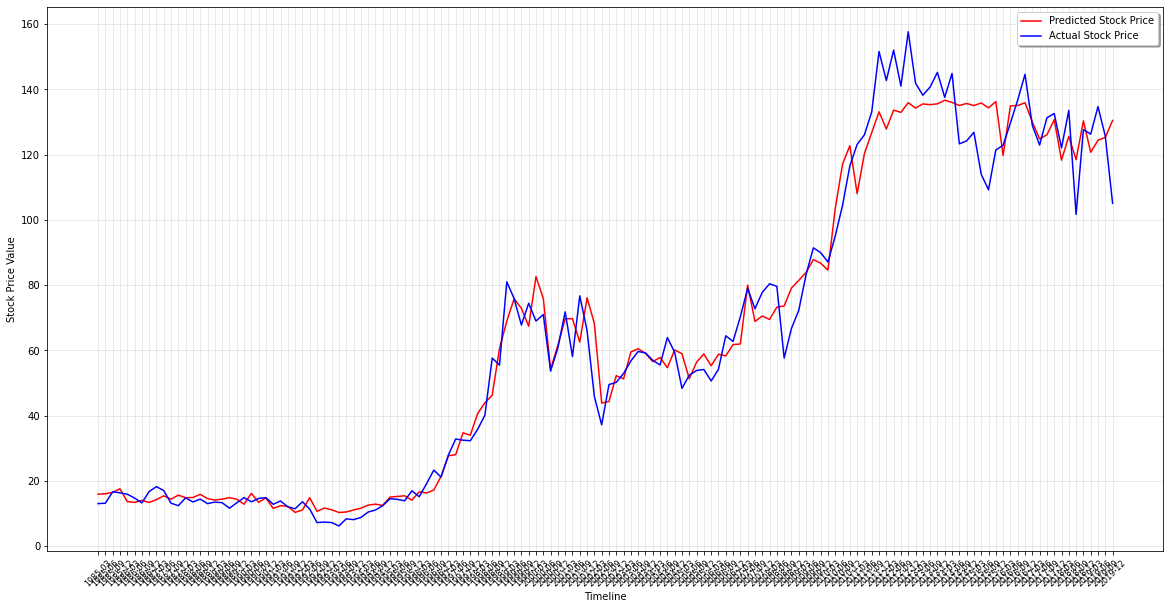

RMSE 7.667749340620932
R2-score test: 0.9541901690800624
R2-score_adj test: 0.9465551972600728
RMSE test: 9.45568114715969
MAE test: 6.938353669322228


In [38]:
#params = str(Params)
# Chage on attributes and no change on PricePerShare
# Reduced attributes v2
# TSCO

# Plot parameters
START_DATE_FOR_PLOTTING = '1985-03'
ENDING_DATE_FOR_PLOTTING = '2020-03'
START_INDEX = data.index.get_loc(START_DATE_FOR_PLOTTING)
ENDING_INDEX = data.index.get_loc(ENDING_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(data.index[START_INDEX:ENDING_INDEX], PRED[START_INDEX:ENDING_INDEX], color='red', label='Predicted Stock Price')
plt.plot(data.index[START_INDEX:ENDING_INDEX], y_scaled[START_INDEX:ENDING_INDEX], color='b', label='Actual Stock Price')

#plt.axvline(x = data.index[-5], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
#plt.title(params, family='DejaVu Sans', fontsize=12)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

print("RMSE",mean_squared_error(y_scaled, PRED, squared=False))
print("R2-score test:",r2_score(y_test, mlp.predict(X_test)))
print("R2-score_adj test:",1-(1-r2_score(y_test, mlp.predict(X_test)))*(len(y_test)-1)/(len(y_test)-4-1))
print("RMSE test:",mean_squared_error(y_test, mlp.predict(X_test), squared=False))
print("MAE test:",mean_absolute_error(y_test, mlp.predict(X_test)))

## 3.1 Random split - No scaled prediction variable

In [ ]:
from lib.fundamental_lib import holdout
mlp = GridSearchCV(MLPRegressor(max_iter=100000), n_jobs=-1, error_score=1, 
                   param_grid={"hidden_layer_sizes": [(5,), (10,), (20,), (30,), (50,)],
                               "activation": ['identity', 'logistic', 'tanh', 'relu'],
                               "solver": ['sgd', 'adam']
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, mlp, scaling=False)

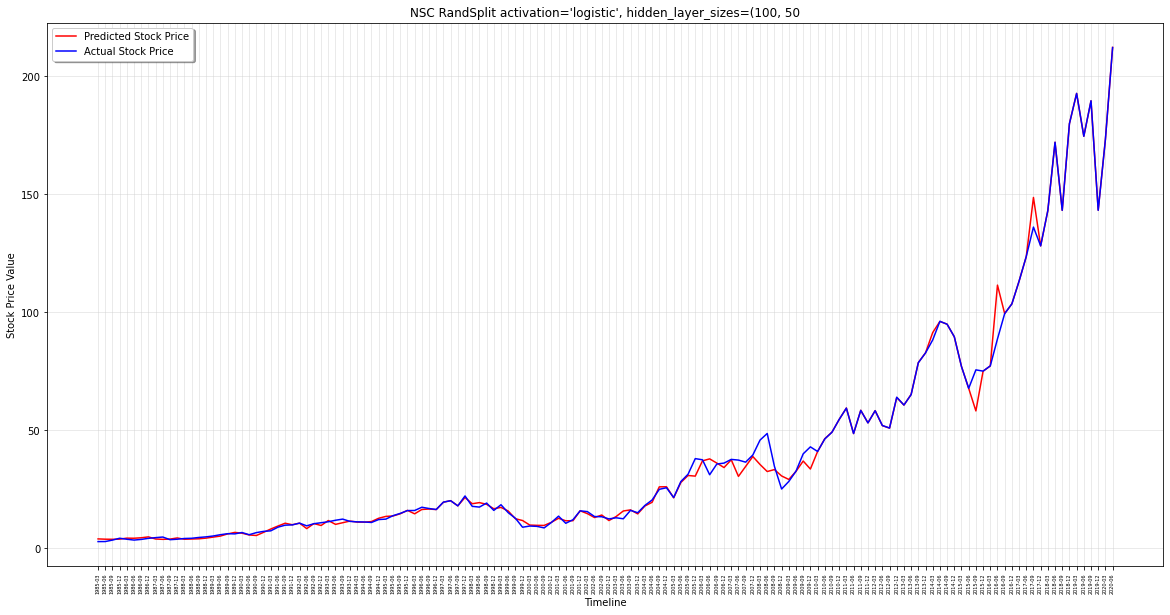

NSC MODEL RESULTS
 RMSE
 	Train: 0.7370830932155418
 	Test: 7.520358637347953
 	Dataset: 3.449995699231497
 MAPE
 	Train: 0.040116266788891915
 	Test: 0.1388701638194421
 	Dataset: 0.060143280872010485
 R2 Score Adj
 	Train: 0.9997759620691332
 	Test: 0.8703481035375804
 	Dataset: 0.9945662063782418



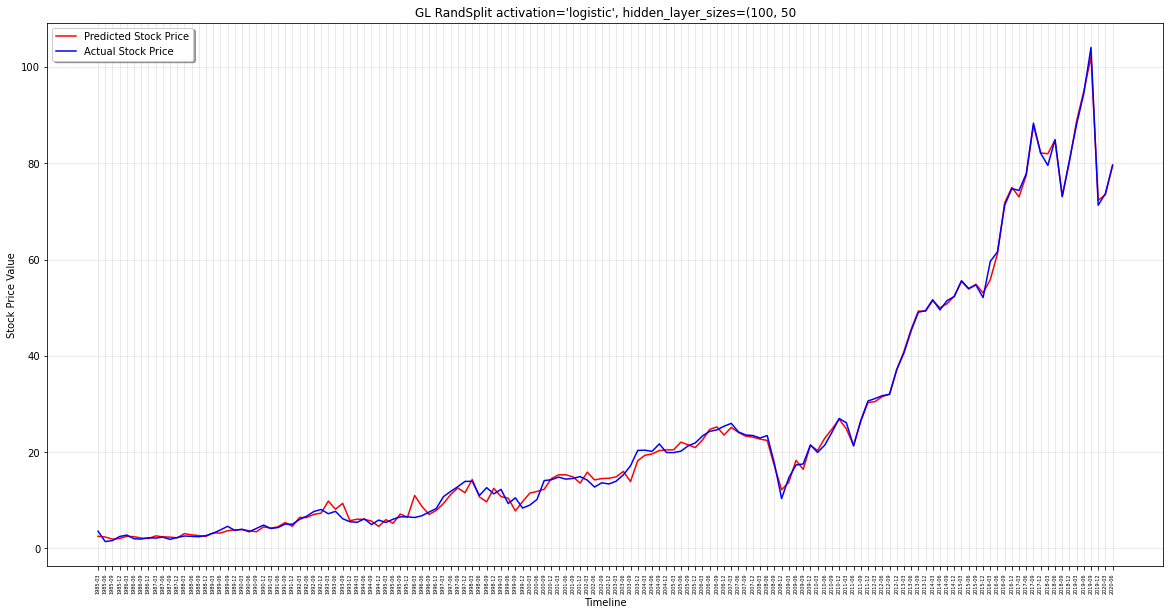

GL MODEL RESULTS
 RMSE
 	Train: 0.7160665750718295
 	Test: 2.051621571113763
 	Dataset: 1.1235527872901303
 MAPE
 	Train: 0.058824156807941806
 	Test: 0.16543052585351076
 	Dataset: 0.0804436302507495
 R2 Score Adj
 	Train: 0.9991493019567661
 	Test: 0.9779025033659747
 	Dataset: 0.997812522357751



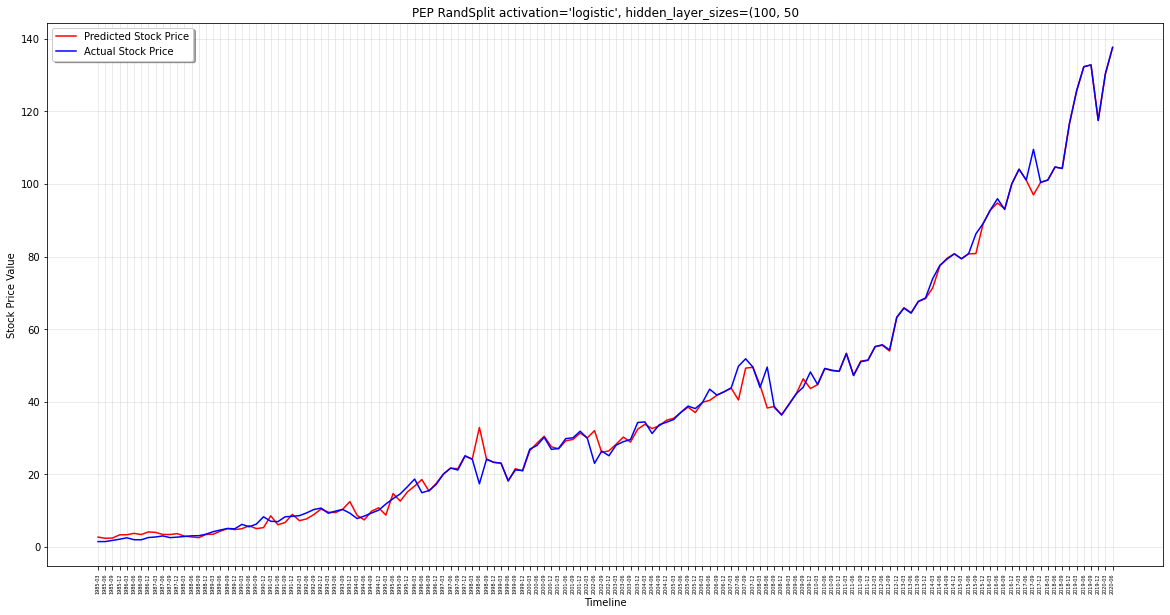

PEP MODEL RESULTS
 RMSE
 	Train: 0.6819342882103457
 	Test: 5.327255766177266
 	Dataset: 2.4750840693804275
 MAPE
 	Train: 0.07416267084486511
 	Test: 0.1690888803647711
 	Dataset: 0.09341344060764324
 R2 Score Adj
 	Train: 0.9996158341608258
 	Test: 0.9238896963854666
 	Dataset: 0.9946766373193215



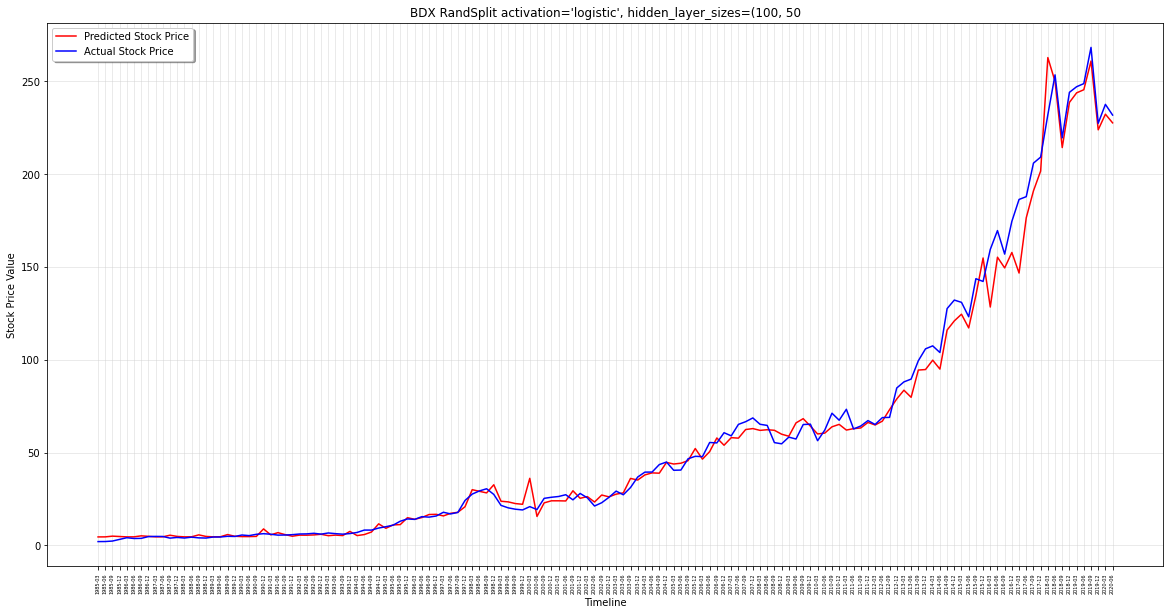

BDX MODEL RESULTS
 RMSE
 	Train: 4.7622281167922775
 	Test: 12.13105310382268
 	Dataset: 6.92269811247326
 MAPE
 	Train: 0.1112250442872659
 	Test: 0.18109153000951597
 	Dataset: 0.12539377216100892
 R2 Score Adj
 	Train: 0.9950416726206636
 	Test: 0.9054829861785795
 	Dataset: 0.9891247359271244



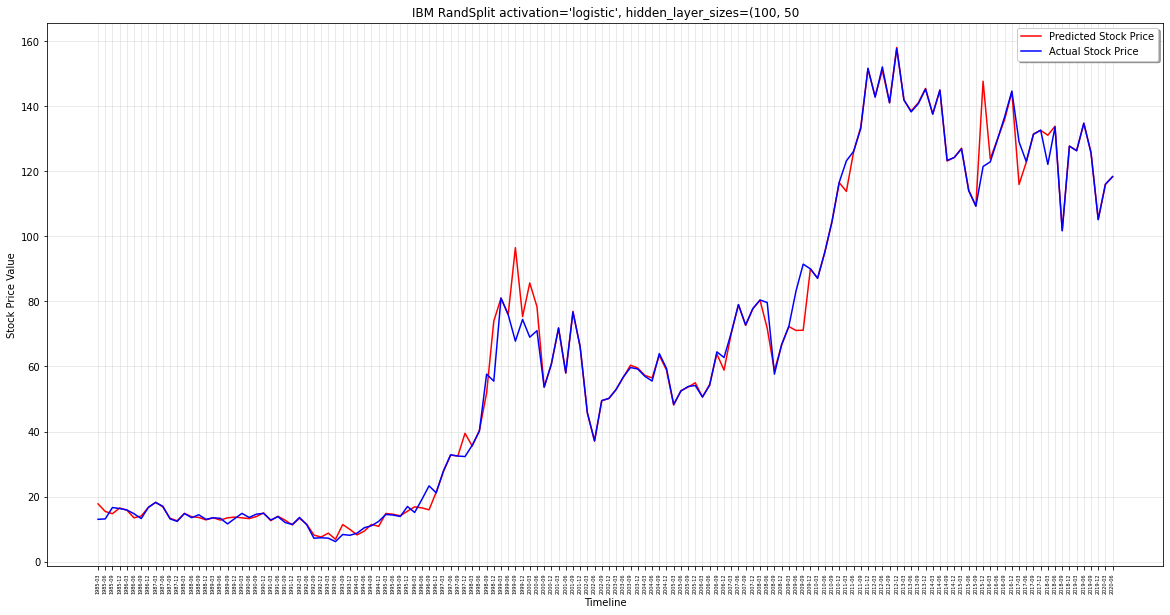

IBM MODEL RESULTS
 RMSE
 	Train: 0.5462722070594128
 	Test: 10.744200710521763
 	Dataset: 4.862958851588505
 MAPE
 	Train: 0.017467354943199277
 	Test: 0.1469041760428727
 	Dataset: 0.043716780201175004
 R2 Score Adj
 	Train: 0.9998547506351083
 	Test: 0.8429847186053018
 	Dataset: 0.9881254163205474



In [4]:
from lib.fundamental_lib import model_results
#Best Params
#Params={'activation': 'identity', 'hidden_layer_sizes': 50, 'solver': 'sgd'}
Params={'activation': 'logistic', 'hidden_layer_sizes': (100, 50), 'solver': 'sgd'}
mlp = MLPRegressor(max_iter=100000, activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_PCA_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results(data, mlp, label=stock, scaling=False)

## 3.2 Random split - Scaled prediction variable

In [ ]:
from lib.fundamental_lib import holdout
mlp = GridSearchCV(MLPRegressor(max_iter=100000), n_jobs=-1, error_score=1, 
                   param_grid={"hidden_layer_sizes": [(5,), (10,), (20,), (30,), (50,)],
                               "activation": ['identity', 'logistic', 'tanh', 'relu'],
                               "solver": ['sgd', 'adam']
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, mlp, scaling=True)

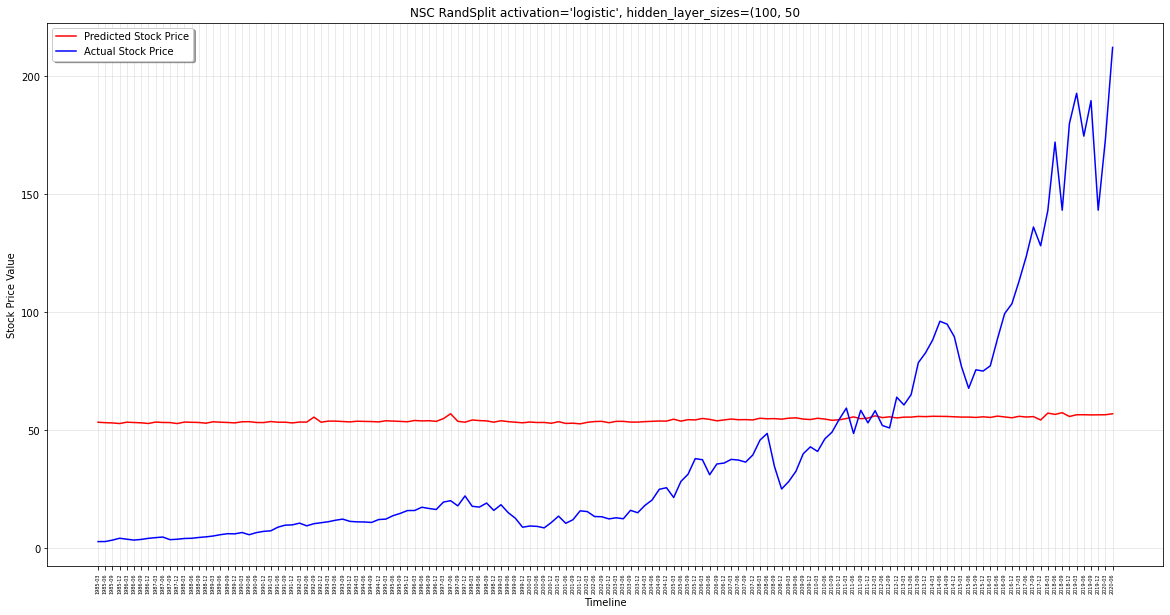

NSC MODEL RESULTS
 RMSE
 	Train: 52.27730717564611
 	Test: 40.127413256274075
 	Dataset: 50.05232157108838
 MAPE
 	Train: 3.2610522774727095
 	Test: 3.097556212600599
 	Dataset: 3.227895732848296
 R2 Score Adj
 	Train: -0.14622189075742575
 	Test: -2.16748833542309
 	Dataset: -0.14370622401957278



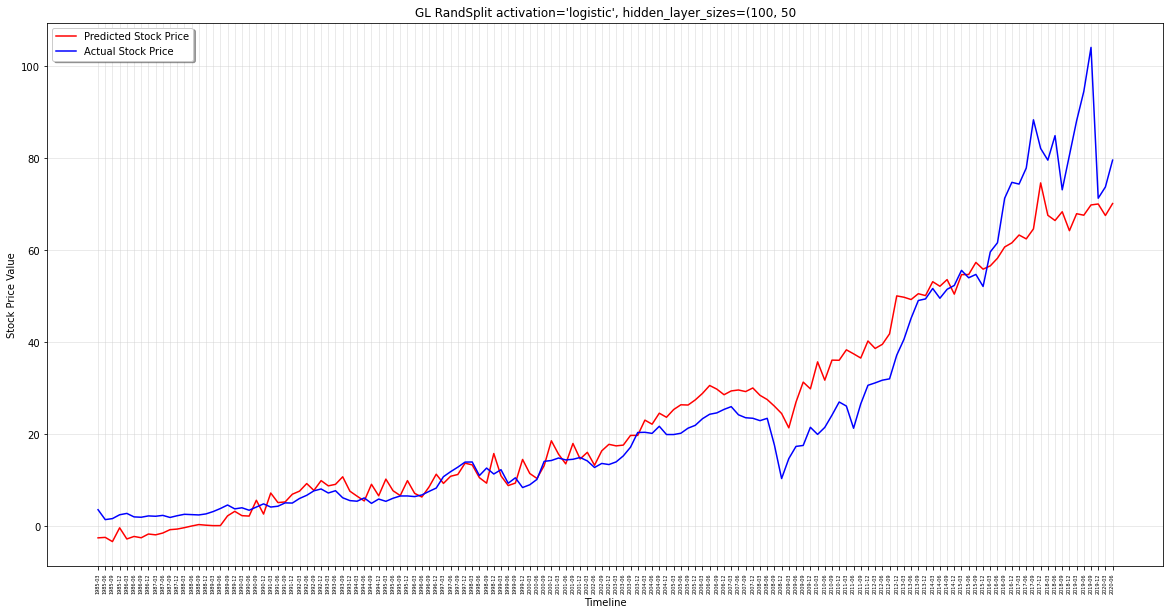

GL MODEL RESULTS
 RMSE
 	Train: 7.966101161845098
 	Test: 6.280153062310774
 	Dataset: 7.654272938144758
 MAPE
 	Train: 0.43306891482278687
 	Test: 0.35868975381828255
 	Dataset: 0.41798502902467066
 R2 Score Adj
 	Train: 0.8953805963278864
 	Test: 0.7874894748600978
 	Dataset: 0.8984769752188819



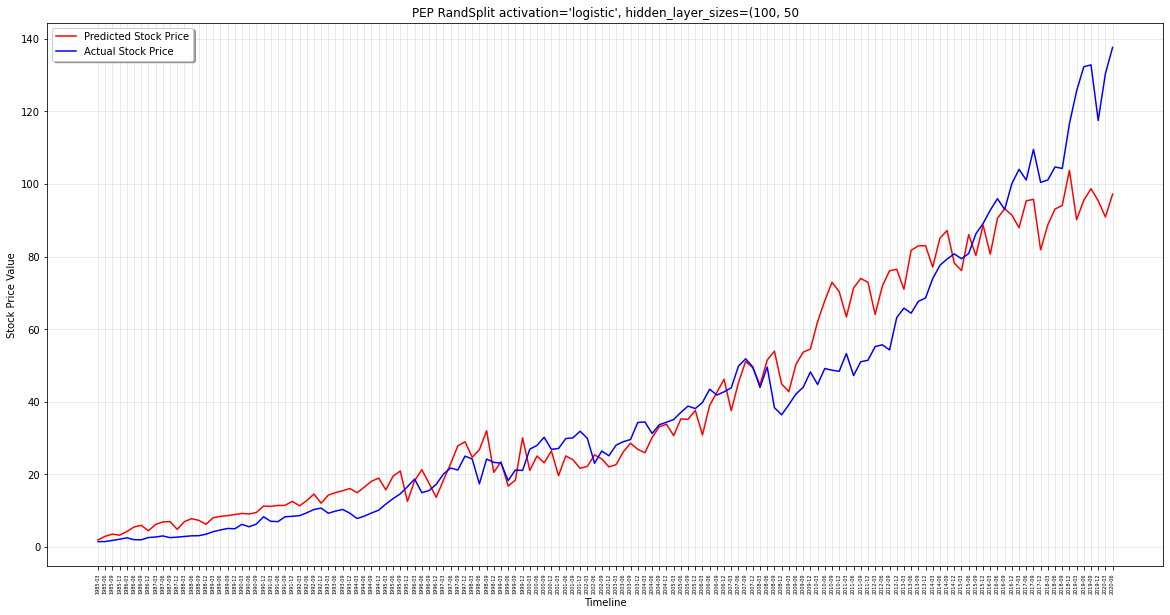

PEP MODEL RESULTS
 RMSE
 	Train: 12.65021461311154
 	Test: 5.469090726176156
 	Dataset: 11.560301506022304
 MAPE
 	Train: 0.36359300054940225
 	Test: 0.34212250062697064
 	Dataset: 0.3592388432224755
 R2 Score Adj
 	Train: 0.8678006026256823
 	Test: 0.9197829634351096
 	Dataset: 0.8838699887366143



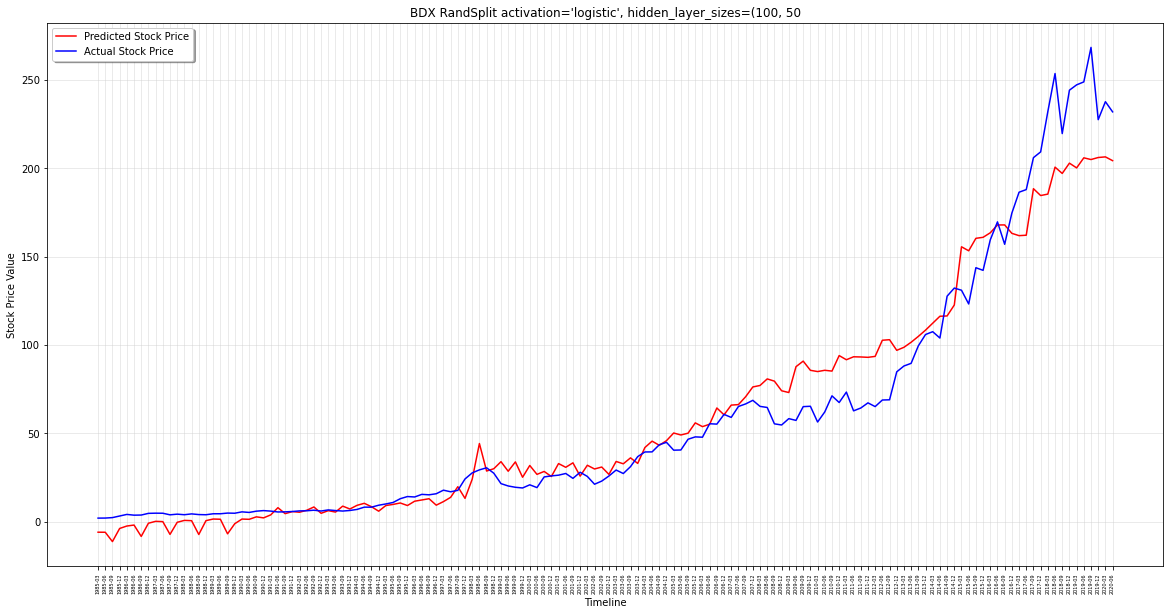

BDX MODEL RESULTS
 RMSE
 	Train: 18.010465795586786
 	Test: 9.760222990800639
 	Dataset: 16.670723205523483
 MAPE
 	Train: 0.5047569994013128
 	Test: 0.3636706205604181
 	Dataset: 0.476145076419593
 R2 Score Adj
 	Train: 0.93142031453365
 	Test: 0.9218834787229258
 	Dataset: 0.9369336195495733



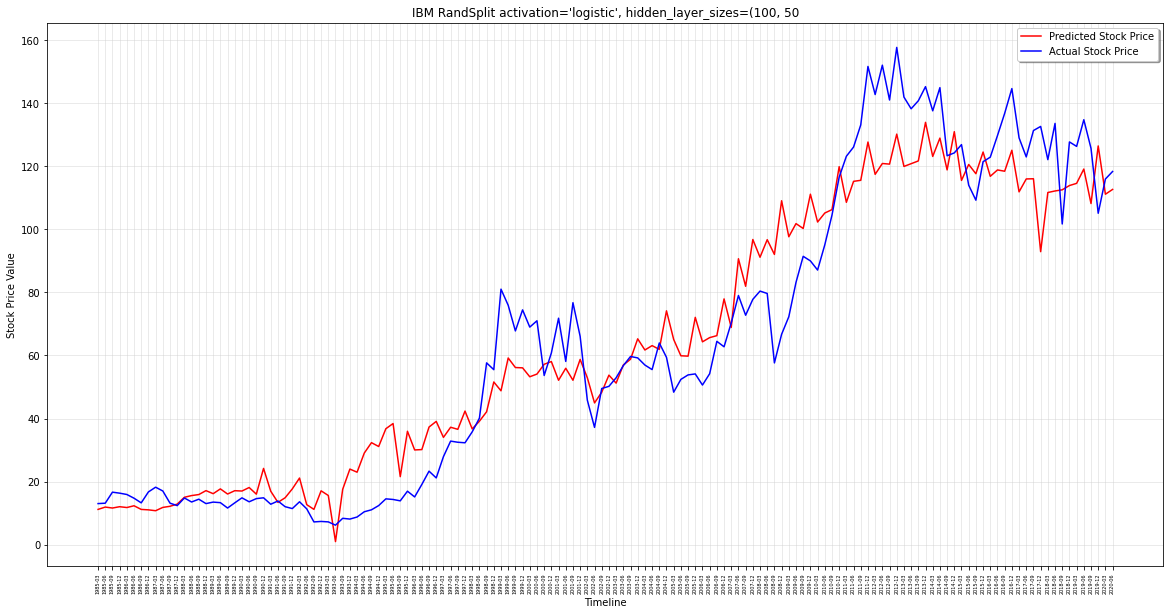

IBM MODEL RESULTS
 RMSE
 	Train: 14.24412784482135
 	Test: 12.057832250519763
 	Dataset: 13.82872214658481
 MAPE
 	Train: 0.31762904005204873
 	Test: 0.2362919096564702
 	Dataset: 0.3011340975242741
 R2 Score Adj
 	Train: 0.8974251837260109
 	Test: 0.839409698290738
 	Dataset: 0.9039756659136053



In [9]:
from lib.fundamental_lib import model_results
#Best Params
#Params={'activation': 'identity', 'hidden_layer_sizes': 50, 'solver': 'sgd'}
Params={'activation': 'logistic', 'hidden_layer_sizes': (100, 50), 'solver': 'sgd'}
mlp = MLPRegressor(max_iter=100000, activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_PCA_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results(data, mlp, label=stock, scaling=True)

## 3.3 Sequential split - No scaled prediction variable

In [ ]:
from lib.fundamental_lib import holdout
mlp = GridSearchCV(MLPRegressor(max_iter=100000), n_jobs=-1, error_score=1, 
                   param_grid={"hidden_layer_sizes": [(5,), (10,), (20,), (30,), (50,)],
                               "activation": ['identity', 'logistic', 'tanh', 'relu'],
                               "solver": ['sgd', 'adam']
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, mlp, scaling=False, manual=True)

In [ ]:
from lib.fundamental_lib import model_results
#Best Params
Params={'activation': 'logistic', 'hidden_layer_sizes': (100, 50), 'solver': 'sgd'}
mlp = MLPRegressor(max_iter=100000, activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_PCA_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, mlp, label=stock, scaling=False)

## 3.4 Sequential split - Scaled prediction variable

In [ ]:
from lib.fundamental_lib import holdout
mlp = GridSearchCV(MLPRegressor(max_iter=100000), n_jobs=-1, error_score=1, 
                   param_grid={"hidden_layer_sizes": [(5,), (10,), (20,), (30,), (50,)],
                               "activation": ['identity', 'logistic', 'tanh', 'relu'],
                               "solver": ['sgd', 'adam']
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, mlp, scaling=True, manual=True)

In [ ]:
from lib.fundamental_lib import model_results
#Best Params
#Params={'activation': 'identity', 'hidden_layer_sizes': 50, 'solver': 'sgd'}
Params={'activation': 'logistic', 'hidden_layer_sizes': (100, 50), 'solver': 'sgd'}
mlp = MLPRegressor(max_iter=100000, activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_PCA_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, mlp, label=stock, scaling=True)